<a href="https://colab.research.google.com/github/jananee-dhanasekaran/ai-science-training-series/blob/main/01_intro_AI_on_Supercomputer/HW1-ai-training-series-ALCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset
We used a realestate dataset from Kaggle to produce this reduced dataset. This dataset contains the _sale price_ and _above ground square feet_ of many houses. We can use this data for our linear regression.

We use Pandas to read the data file which is stored as Comma Separated Values (CSV). and print the column labels. CSV files are similar to excel sheets.

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-11-26 11:19:55--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-11-26 11:19:55 (56.3 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


Now pandas provides some helpful tools for us to inspect our data. It provides a `plot()` function that, behind the scenes, is calling into the _Matplotlib_ library and calling the function [matplotlib.pyplot.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). In this case, we simply tell it the names of the columns we want as our _x_ and _y_ values and the `style` (`'.'` tells `matplotlib` to use a small dot to represent each data point).

<Axes: xlabel='GrLivArea'>

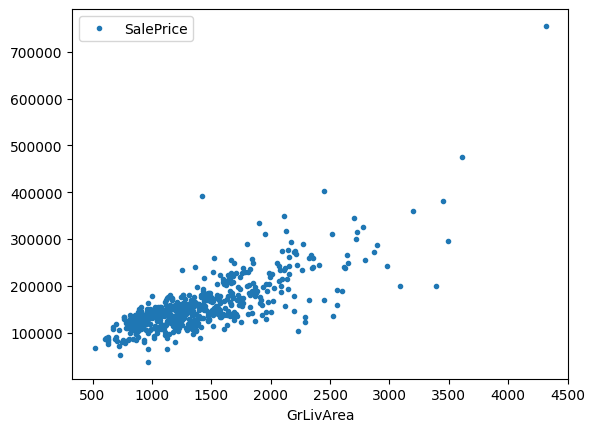

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [4]:
n = len(data)

In [5]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

Now we will calculate $\Sigma xy$, $\Sigma x$, $\Sigma y$, and $\Sigma x^2$:

In [6]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

The denominator in the equation for $m$ and $b$ are the same so we can calculate that once:

In [7]:
denominator = n * sum_x2 - sum_x * sum_x

Then we can calculate our fit values:

In [8]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


Now we can plot the fit results with our data to see how we did.

First we define a plotting function because we're going to do this often and we want to reuse our code:

In [9]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

Now can use this function to plot our results:

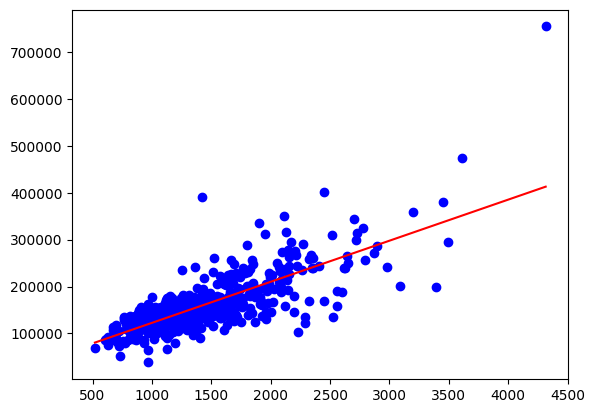

In [10]:
plot_data(x,y,m,b)

### Training through Stochastic Gradient Descent (SGD)

SGD is a common method in AI for training deep neural networks on large datasets. It is an iterative method for optimizing a loss function that we get to define. We will use this simple linear regression to demonstrate how it works.

#### The model

In AI, neural networks are often referred to as a _model_ because, once fully trained, they should model (AKA predict) the behavior of our system. In our example, the system is how house prices vary based on house size. We know our system is roughly driven by a linear function:

$$ \hat{y_i}(x_i) = m * x_i + b $$

We just need to figure out $m$ and $b$. Let's create a function that calculates our model given $x$, $m$, and $b$.


In [11]:
def model(x,m,b):
   return m * x + b

In [12]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [13]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [14]:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


Then we can calculate our Loss function:

In [15]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


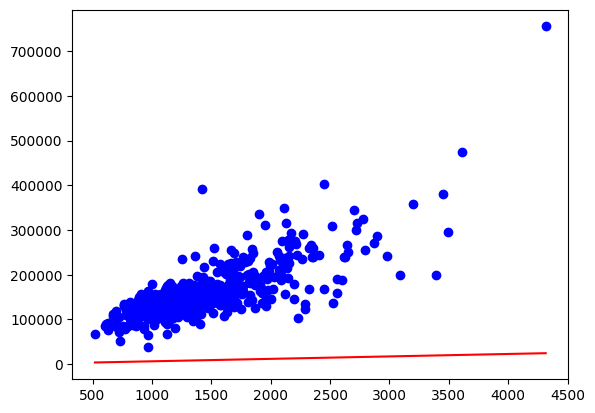

In [16]:
learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

[029]  dy_i = 88.89 * x + 32912.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478200827.641291


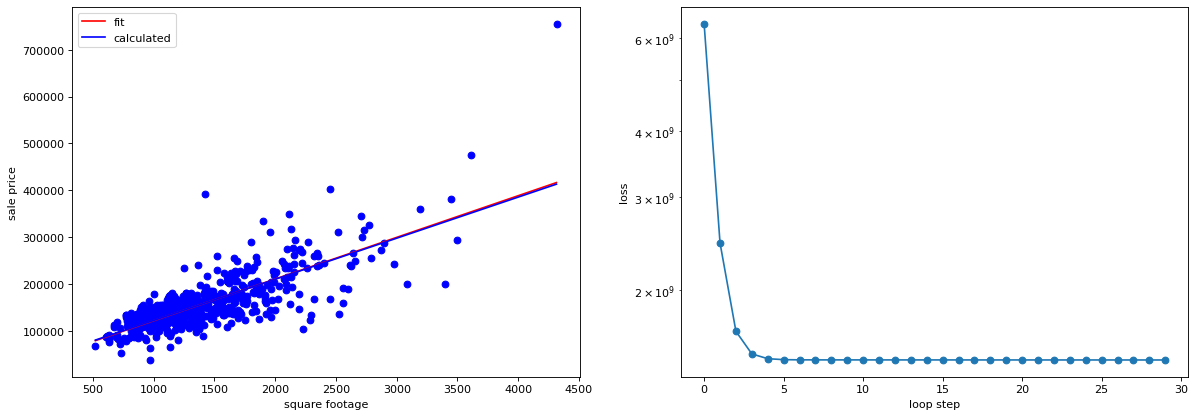

In [17]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

   # close/delete previous plots
   plt.close('all')

   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)



**HomeWork 1**

Training with different batch sizes:
Batch size: 32, Final m: 91.2299, Final b: 30568.2335, Final Loss: 1481868378.2988


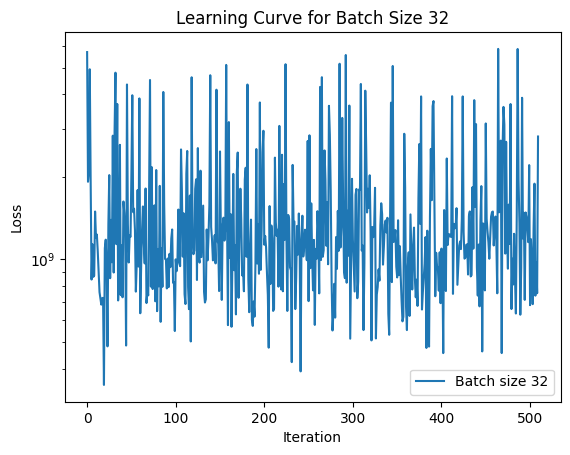

Batch size: 64, Final m: 96.0501, Final b: 31521.9314, Final Loss: 1569939372.7857


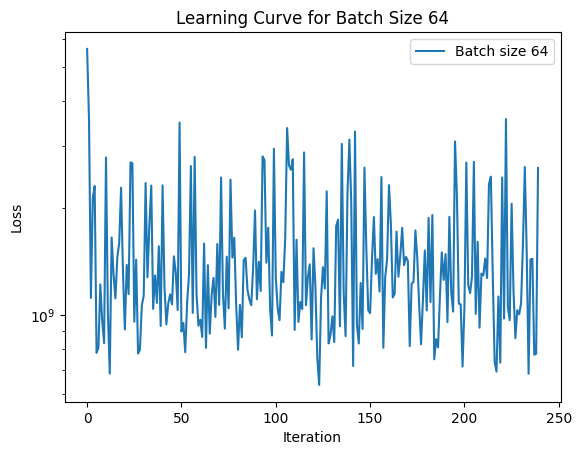

Batch size: 128, Final m: 88.8342, Final b: 31853.2975, Final Loss: 1479799178.9698


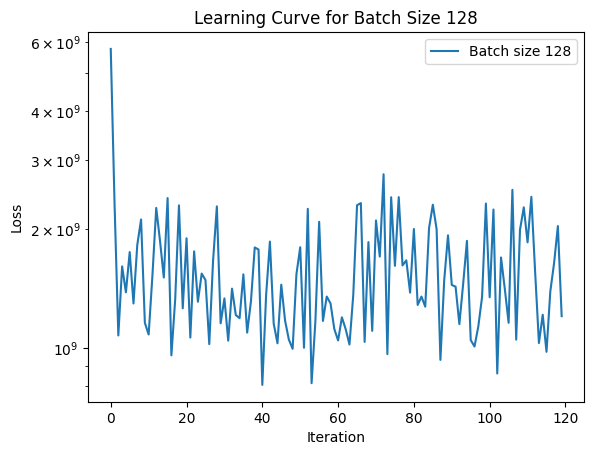

Batch size: 256, Final m: 87.1320, Final b: 33973.8775, Final Loss: 1480310389.4806


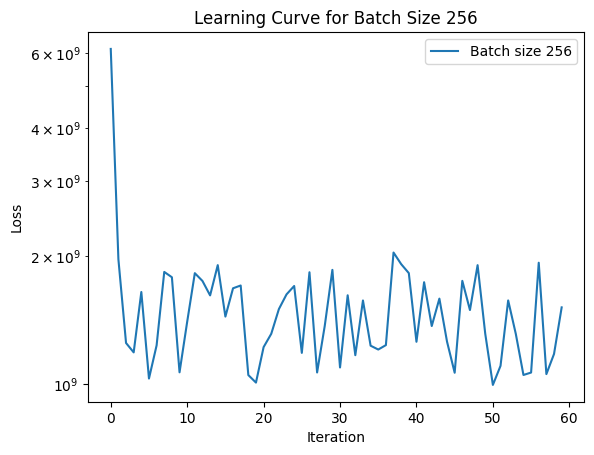

Batch size: 512, Final m: 88.5469, Final b: 32997.1753, Final Loss: 1478284273.0362


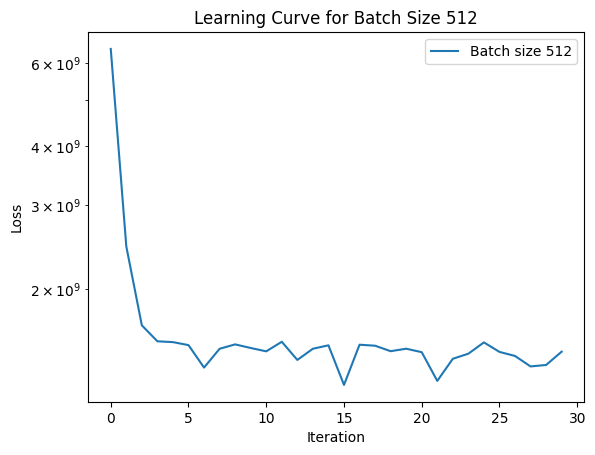


Training with increasing learning rates and batch sizes:
Batch size: 64, Learning Rates: m=1.00e-07, b=1.00e-01, Final m: 84.6128, Final b: 32729.9002, Final Loss: 1520754896.8173


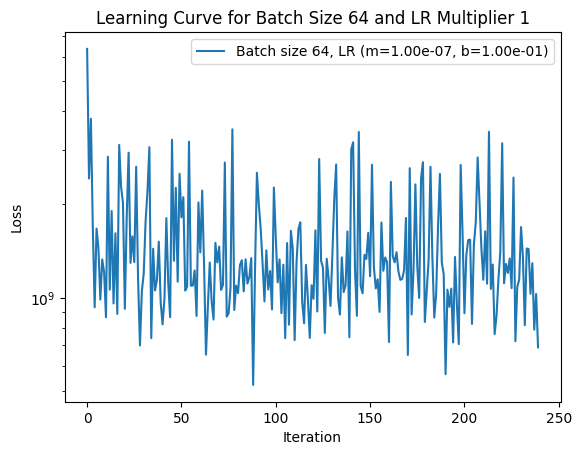

Batch size: 128, Learning Rates: m=2.00e-07, b=2.00e-01, Final m: 86.5745, Final b: 35190.1353, Final Loss: 1479403440.6279


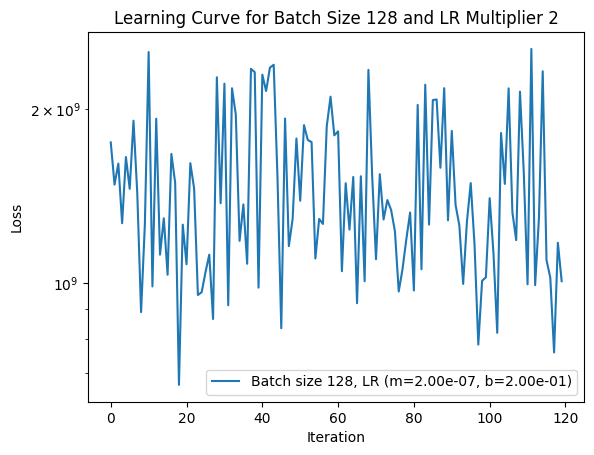

Batch size: 256, Learning Rates: m=4.00e-07, b=4.00e-01, Final m: 83.6102, Final b: 40577.1517, Final Loss: 1482355926.3192


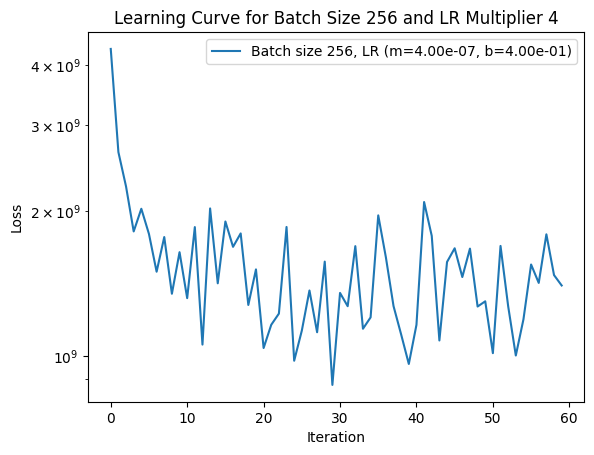

Batch size: 512, Learning Rates: m=8.00e-07, b=8.00e-01, Final m: 106061.4442, Final b: -1405729.7486, Final Loss: 24919763323159716.0000


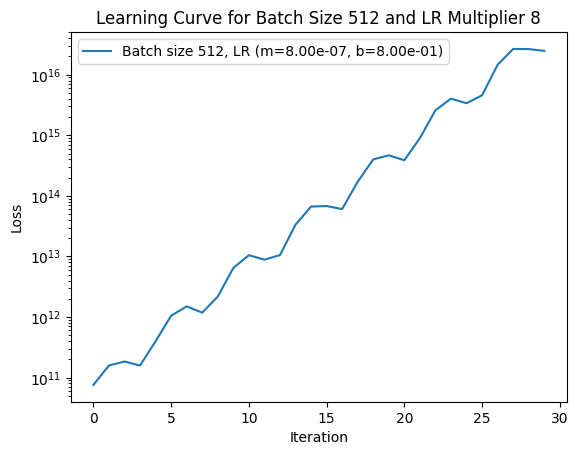

In [19]:
def train(batch_size, epochs=30, learning_rate_m=1e-7, learning_rate_b=1e-1):
    loss_history = []
    num_batches = len(data) // batch_size
    loop_N = epochs * num_batches
    m = 5.0  # Initial slope
    b = 1000.0  # Initial intercept

    for i in range(loop_N):
        # Sample a batch of data
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

        # Update slope and intercept
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # Calculate loss
        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_history.append(loss_value)

    final_loss = np.mean(loss(x, y, m, b))  # Loss on the whole dataset
    return m, b, final_loss, loss_history

# Mini-batch training with different batch sizes
batch_sizes = [32, 64, 128, 256, 512]
epochs = 30

print("Training with different batch sizes:")
for bs in batch_sizes:
    m, b, final_loss, loss_history = train(batch_size=bs, epochs=epochs)
    print(f"Batch size: {bs}, Final m: {m:.4f}, Final b: {b:.4f}, Final Loss: {final_loss:.4f}")

    # Plot learning curve
    plt.figure()
    plt.plot(loss_history, label=f"Batch size {bs}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.title(f"Learning Curve for Batch Size {bs}")
    plt.legend()
    plt.show()

# Experimenting with increasing batch sizes and learning rates
print("\nTraining with increasing learning rates and batch sizes:")
base_batch_size = 64
base_lr_m = 1e-7
base_lr_b = 1e-1

for i in [1, 2, 4, 8]:
    bs = base_batch_size * i
    lr_m = base_lr_m * i
    lr_b = base_lr_b * i
    m, b, final_loss, loss_history = train(batch_size=bs, epochs=epochs, learning_rate_m=lr_m, learning_rate_b=lr_b)
    print(f"Batch size: {bs}, Learning Rates: m={lr_m:.2e}, b={lr_b:.2e}, Final m: {m:.4f}, Final b: {b:.4f}, Final Loss: {final_loss:.4f}")

    # Plot learning curve
    plt.figure()
    plt.plot(loss_history, label=f"Batch size {bs}, LR (m={lr_m:.2e}, b={lr_b:.2e})")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.title(f"Learning Curve for Batch Size {bs} and LR Multiplier {i}")
    plt.legend()
    plt.show()

We can see that, if we increase the batch size and the learning rate proportionally, at certain point, it does not converge for example for the case batch size = 512. To increase the learning rate proportional to the batch size is a general practice. However, if the learning rate is too large, it will continue to move around without finding a local minimum. One trick, people can do is to start with a smaller learning rate in the first few steps / epochs, and once the optimization becomes stable, increase the learning rate proportional to the batch size.